# Testing the bias variance tradeoff

In [1]:
%load_ext autoreload
%autoreload 1

import sys
import os

# This adds 'code/' to sys.path
code_dir = os.path.abspath(os.path.dirname(__file__)) if '__file__' in globals() else os.path.abspath('')
if code_dir not in sys.path:
    sys.path.append(code_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%aimport methods.resampling
from methods.resampling import BiasVariance

In [3]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)


## MSE as a function of model complexity (polynomial degree)

In [4]:
# Generate data
np.random.seed(1234)
n = 100

x = np.random.uniform(-1, 1, n)
y = f(x) + 0.1*np.random.normal(0, 1, n)

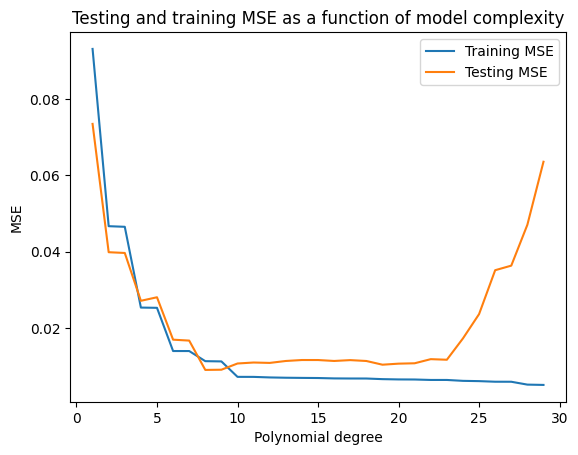

In [5]:
## Figure 2.11 of Hastie et al. 

max_degree = 29

bias_variance_analyzer = BiasVariance(x,y, max_degree=max_degree)
mse_train = bias_variance_analyzer.direct_mse(test_data = False)
mse_test = bias_variance_analyzer.direct_mse(test_data = True)

plt.plot(range(1,max_degree+1), mse_train,label="Training MSE")
plt.plot(range(1,max_degree+1), mse_test,label="Testing MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.title("Testing and training MSE as a function of model complexity")
plt.show()

## MSE and Bias/variance using bootstrap

In [6]:
# Generate data
np.random.seed(1234)
n = 300

x = np.random.uniform(-1, 1, n)
y = f(x) + 0.1*np.random.normal(0, 1, n)

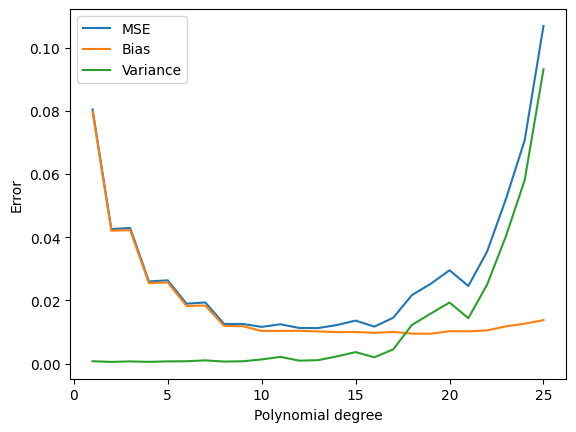

In [7]:
max_degree = 25
bias_variance_analyzer = BiasVariance(x,y, max_degree=max_degree)
mse, bias, variance = bias_variance_analyzer.bootstrap(n_bootstraps = 100)
plt.plot(range(1, max_degree+1), mse, label="MSE")
plt.plot(range(1, max_degree+1), bias, label="Bias")
plt.plot(range(1, max_degree+1), variance, label="Variance")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend()
plt.show()

## MSE using K-fold Cross-Validation

In [8]:
# Generate data
np.random.seed(1234)
n = 300

x = np.random.uniform(-1, 1, n)
y = f(x) + 0.1*np.random.normal(0, 1, n)

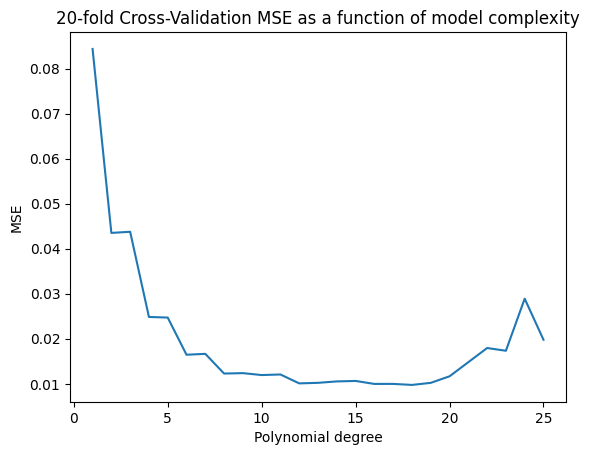

In [9]:
max_degree = 25
k = 20
bias_variance_analyzer = BiasVariance(x,y, max_degree=max_degree)
mse = bias_variance_analyzer.k_fold_cross_validation(k)

plt.plot(range(1,max_degree+1), mse)
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title(f"{k}-fold Cross-Validation MSE as a function of model complexity")
plt.show()

## Bootstrap MSE vs. Cross-Validation MSE

In [10]:
# Generate data
np.random.seed(1234)
n = 300

x = np.random.uniform(-1, 1, n)
y = f(x) + 0.1*np.random.normal(0, 1, n)

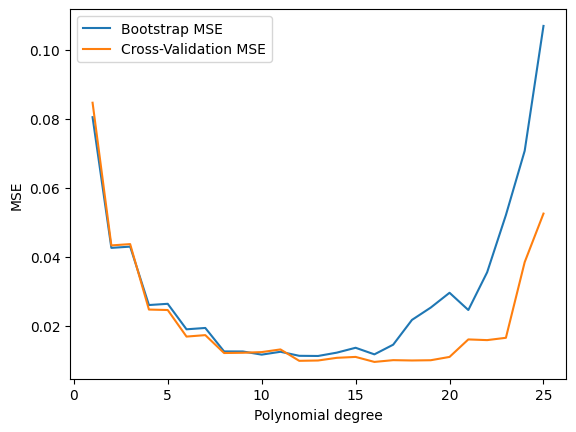

In [11]:
max_degree = 25
bias_variance_analyzer = BiasVariance(x,y, max_degree=max_degree)

# Bootstrao
n_bootstraps = 100
bootstrap_mse = bias_variance_analyzer.bootstrap(n_bootstraps)[0]

# K-fold Cross-validation
k = 10
cross_validation_mse = bias_variance_analyzer.k_fold_cross_validation(k)


plt.plot(range(1,max_degree+1), bootstrap_mse, label="Bootstrap MSE")
plt.plot(range(1,max_degree+1), cross_validation_mse, label="Cross-Validation MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.show()